In [1]:
import sys
import os

import open3d as o3d
import numpy as np

sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))
import limbs3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Read Point Cloud data

In [19]:
input_dir="./data/"
filename="sample.ply"

pcd = o3d.io.read_point_cloud(os.path.join(input_dir,filename))

In [32]:
o3d.visualization.draw_geometries([pcd])
#o3d.visualization.draw_plotly([pcd])

[Open3D INFO]   -- Mouse view control --
[Open3D INFO]     Left button + drag         : Rotate.
[Open3D INFO]     Ctrl + left button + drag  : Translate.
[Open3D INFO]     Wheel button + drag        : Translate.
[Open3D INFO]     Shift + left button + drag : Roll.
[Open3D INFO]     Wheel                      : Zoom in/out.
[Open3D INFO] 
[Open3D INFO]   -- Keyboard view control --
[Open3D INFO]     [/]          : Increase/decrease field of view.
[Open3D INFO]     R            : Reset view point.
[Open3D INFO]     Ctrl/Cmd + C : Copy current view status into the clipboard.
[Open3D INFO]     Ctrl/Cmd + V : Paste view status from clipboard.
[Open3D INFO] 
[Open3D INFO]   -- General control --
[Open3D INFO]     Q, Esc       : Exit window.
[Open3D INFO]     H            : Print help message.
[Open3D INFO]     P, PrtScn    : Take a screen capture.
[Open3D INFO]     D            : Take a depth capture.
[Open3D INFO]     O            : Take a capture of current rendering settings.
[Open3D INFO

### Pre-preperation
1. Divide the legs into left and right and focus on analyzing the data from the left leg.
2. Detect the floor surface using RANSAC and align it with the XY plane.
3. Remove any erroneously measured data that appears inside the legs.
4. Remove the floor.
   1. Detect and remove the floor surface using RANSAC.
   2. Remove points that are less than 5mm from the detected floor surface.
   3. Remove any clusters identified by DBSCAN that are not part of the main cluster.

In [22]:
l_cropped,r_cropped = limbs3d.separate2legs(pcd,vis=False)

pcd_tmp=limbs3d.align2Floor(l_cropped)

pcd_tmp = limbs3d.removeHiddenPoints(pcd_tmp,dx=50,vis=False)

pcd_tmp=limbs3d.deleteFloor(pcd_tmp,vis=False,distance_threshold=5)
pcd_tmp=pcd_tmp.select_by_index(np.where(np.asarray(pcd_tmp.points)[:,0] >=5)[0])

pcd_tmp=limbs3d.getMainClusterDBSCAN(pcd_tmp,eps=5, min_points=5, print_progress=True,vis=False)

l_pcd=limbs3d.centerYZ(pcd_tmp)
l_mesh=limbs3d.get_surface(l_pcd,auto_normals=True)

Plane equation: 0.76x + -0.26y + -0.59z + 141.06 = 0
Plane equation: 1.00x + 0.00y + -0.00z + -0.03 = 0
Plane equation: 1.00x + -0.00y + 0.00z + -0.57 = 0
Plane equation: 1.00x + 0.00y + 0.00z + 0.14 = 0
[Open3D DEBUG] Input Points / Samples: 20349 / 19482
[Open3D DEBUG] #   Got kernel density: 0.099 (s), 406.98 (MB) / 416.395 (MB) / 473 (MB)
[Open3D DEBUG] #     Got normal field: 0.052 (s), 413.66 (MB) / 416.395 (MB) / 473 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 4.427496e-05 / 9.009511e-01
[Open3D DEBUG] #       Finalized tree: 0.131 (s), 430.492 (MB) / 430.492 (MB) / 473 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.198 (s), 424.707 (MB) / 430.492 (MB) / 473 (MB)
[Open3D DEBUG] #Set point constraints: 0.0369999 (s), 422.633 (MB) / 430.492 (MB) / 473 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 591830 / 388568 / 287809
[Open3D DEBUG] Memory Usage: 422.633 MB
[Open3D DEBUG] # Linear system solved: 0.412 (s), 431.414 (MB) / 431.414 (MB) / 473 (MB)
[Open3D DEBU

In [33]:
o3d.visualization.draw_geometries([l_mesh])
#o3d.visualization.draw_plotly([l_mesh]h)

[Open3D INFO]   -- Mouse view control --
[Open3D INFO]     Left button + drag         : Rotate.
[Open3D INFO]     Ctrl + left button + drag  : Translate.
[Open3D INFO]     Wheel button + drag        : Translate.
[Open3D INFO]     Shift + left button + drag : Roll.
[Open3D INFO]     Wheel                      : Zoom in/out.
[Open3D INFO] 
[Open3D INFO]   -- Keyboard view control --
[Open3D INFO]     [/]          : Increase/decrease field of view.
[Open3D INFO]     R            : Reset view point.
[Open3D INFO]     Ctrl/Cmd + C : Copy current view status into the clipboard.
[Open3D INFO]     Ctrl/Cmd + V : Paste view status from clipboard.
[Open3D INFO] 
[Open3D INFO]   -- General control --
[Open3D INFO]     Q, Esc       : Exit window.
[Open3D INFO]     H            : Print help message.
[Open3D INFO]     P, PrtScn    : Take a screen capture.
[Open3D INFO]     D            : Take a depth capture.
[Open3D INFO]     O            : Take a capture of current rendering settings.
[Open3D INFO

### Get perimeter of given HEIGHT

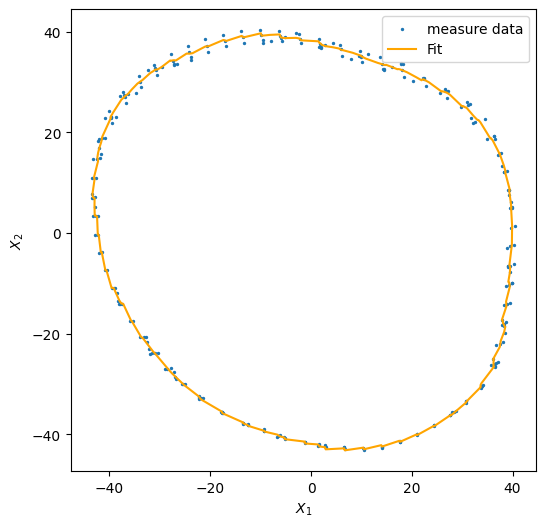

perimeter is 27.09 cm


In [24]:
height=200
peri= limbs3d.perimeter_by_savgol(l_pcd,length=height,window=10,graph=True)
print(f"perimeter is {peri/10:.2f} cm")

### Get the volume from BOTTOM to TOP

In [25]:
top=250
bottom=150

l_mesh_parts=limbs3d.crop_between_top_and_bottom(l_mesh,top=top,bottom=bottom,vis=False)
vol=limbs3d.get_vol(limbs3d.get_fix(l_mesh_parts))
print(f"volume is {vol/1000:.2f} cm^3")

Patching holes...
Patched 2 holes
Fixing degeneracies and intersections
volume is 548.30 cm^3
